<a href="https://colab.research.google.com/github/nihalB05/Google-merchendise-store-customer-revenue-prediction-project-/blob/main/project_googlecustrev_eda_and_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df_train=pd.read_csv("/content/drive/MyDrive/df_train_cleaned_final.csv")
df_train.head()

<ipython-input-3-7781e31986e4>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv("/content/drive/MyDrive/df_train_cleaned_final.csv")


,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,...,geoNetwork_subContinent,geoNetwork_country,totals_visits,totals_hits,totals_pageviews,trafficSource_source,trafficSource_medium,totals_transactionRevenue,totals_totalTransactionRevenue,totals_transactions
0,Social,2016-09-02,1050850727039976881,Not Socially Engaged,1472872238,1,1472872238,Safari,Macintosh,False,...,Southeast Asia,Indonesia,1,1,1.0,youtube.com,referral,NaN,NaN,NaN
1,Direct,2017-11-30,7589732656605431413,Not Socially Engaged,1512034084,1,1512034084,Chrome,Android,True,...,Western Europe,Switzerland,1,1,1.0,(direct),(none),NaN,NaN,NaN
2,Organic Search,2017-10-16,2776719179256163496,Not Socially Engaged,1508185733,1,1508185733,Internet Explorer,Windows,False,...,Australasia,New Zealand,1,1,1.0,google,organic,NaN,NaN,NaN
3,Social,2016-09-02,1257547046399219173,Not Socially Engaged,1472826503,1,1472826503,Chrome,Windows,False,...,Western Asia,Turkey,1,1,1.0,youtube.com,referral,NaN,NaN,NaN
4,Organic Search,2017-11-30,2085884759466885671,Not Socially Engaged,1512069005,4,1512069005,Chrome,Windows,False,...,Northern America,United States,1,7,7.0,google,organic,NaN,NaN,NaN


In [4]:
df_agg = df_train.groupby('fullVisitorId').agg({
    'totals_transactionRevenue': 'sum',
    'totals_pageviews': 'sum',
    'visitNumber': 'max',
    'device_deviceCategory': 'last',
    'geoNetwork_country': 'last',

}).reset_index()

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170834 entries, 0 to 170833
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   channelGrouping                 170834 non-null  object 
 1   date                            170834 non-null  object 
 2   fullVisitorId                   170834 non-null  object 
 3   socialEngagementType            170834 non-null  object 
 4   visitId                         170834 non-null  int64  
 5   visitNumber                     170834 non-null  int64  
 6   visitStartTime                  170834 non-null  int64  
 7   device_browser                  170834 non-null  object 
 8   device_operatingSystem          170834 non-null  object 
 9   device_isMobile                 170834 non-null  bool   
 10  device_deviceCategory           170834 non-null  object 
 11  geoNetwork_continent            170834 non-null  object 
 12  geoNetwork_subCo

In [6]:
df_train['date']=pd.to_datetime(df_train['date'],format="%Y-%m-%d")

In [7]:
df_train["visit_day"]=df_train["date"].dt.day
df_train["visit_month"]=df_train["date"].dt.month
df_train["visit_year"]=df_train["date"].dt.year

In [8]:
df_train["day_of_week"]=df_train["date"].dt.dayofweek

In [9]:
df_train['totals_totalTransactionRevenue']=df_train['totals_totalTransactionRevenue'].fillna(0)
df_train['totals_transactionRevenue']=df_train['totals_transactionRevenue'].fillna(0)
df_train['totals_transactions']=df_train['totals_transactions'].fillna(0)

In [10]:
df_train.isnull().sum()

,0
channelGrouping,0
date,0
fullVisitorId,0
socialEngagementType,0
visitId,0
visitNumber,0
visitStartTime,0
device_browser,0
device_operatingSystem,0
device_isMobile,0


In [11]:
df_train["made_a_transaction"]=(df_train["totals_transactionRevenue"]>0).astype(int)

In [12]:
df_train['avg_transaction']=df_train['totals_totalTransactionRevenue']/df_train['totals_transactions'].replace(0,1)

In [13]:
df_train['avg_transaction']=df_train['avg_transaction'].fillna(0)

In [14]:
df_train['log_revenue']=np.log1p(df_train['totals_transactionRevenue'])

In [15]:
df_train_num=df_train.select_dtypes(include=["int","float"])

In [16]:
df_train.rename(columns={'made_a_transaction': 'paying_cust'}, inplace=True)

In [17]:
df_train_num.corr()

,visitId,visitNumber,visitStartTime,totals_visits,totals_hits,totals_pageviews,totals_transactionRevenue,totals_totalTransactionRevenue,totals_transactions,visit_day,visit_month,visit_year,day_of_week,made_a_transaction,avg_transaction,log_revenue
visitId,1.000000,0.012027,1.000000,NaN,-0.020919,-0.024356,-0.009130,-0.010013,-0.016266,0.026820,-0.290446,0.897676,-0.002725,-0.015667,-0.009261,-0.016107
visitNumber,0.012027,1.000000,0.012027,NaN,0.034868,0.040290,0.016868,0.016801,0.015734,-0.001688,-0.015867,0.016547,-0.018411,0.016059,0.017046,0.016926
visitStartTime,1.000000,0.012027,1.000000,NaN,-0.020919,-0.024356,-0.009130,-0.010013,-0.016266,0.026820,-0.290446,0.897676,-0.002725,-0.015667,-0.009261,-0.016107
totals_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
totals_hits,-0.020919,0.034868,-0.020919,NaN,1.000000,0.979159,0.147572,0.155656,0.364082,-0.002188,-0.001795,-0.015146,-0.008545,0.361013,0.150588,0.366001
totals_pageviews,-0.024356,0.040290,-0.024356,NaN,0.979159,1.000000,0.145621,0.154686,0.385356,-0.002483,-0.005264,-0.016177,-0.009799,0.381414,0.148868,0.385624
totals_transactionRevenue,-0.009130,0.016868,-0.009130,NaN,0.147572,0.145621,1.000000,0.988720,0.263738,0.003614,-0.002738,-0.005852,-0.004200,0.265730,0.998202,0.296076
totals_totalTransactionRevenue,-0.010013,0.016801,-0.010013,NaN,0.155656,0.154686,0.988720,1.000000,0.298555,0.003287,-0.002233,-0.006748,-0.004660,0.279976,0.988451,0.310519
totals_transactions,-0.016266,0.015734,-0.016266,NaN,0.364082,0.385356,0.263738,0.298555,1.000000,0.001134,-0.001168,-0.011931,-0.014660,0.970183,0.270612,0.968789
visit_day,0.026820,-0.001688,0.026820,NaN,-0.002188,-0.002483,0.003614,0.003287,0.001134,1.000000,-0.013402,-0.008568,-0.024725,0.001116,0.003553,0.001322


<Axes: >

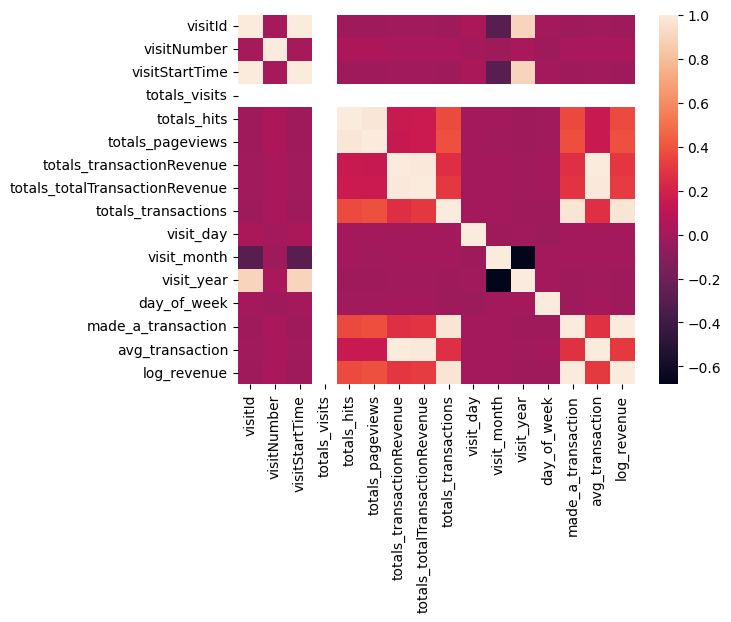

In [18]:
sns.heatmap(df_train_num.corr())

In [19]:
df_agg.head()

,fullVisitorId,totals_transactionRevenue,totals_pageviews,visitNumber,device_deviceCategory,geoNetwork_country
0,59381693533730,0.0,3.0,1,mobile,United States
1,59488412965267,0.0,1.0,1,mobile,United States
2,77980744724824,0.0,4.0,1,desktop,United States
3,88751495106967,0.0,2.0,1,desktop,United States
4,89152042155758,0.0,1.0,1,mobile,United Kingdom


In [20]:
df_train.iloc[0]

,0
channelGrouping,Social
date,2016-09-02 00:00:00
fullVisitorId,1050850727039976881
socialEngagementType,Not Socially Engaged
visitId,1472872238
visitNumber,1
visitStartTime,1472872238
device_browser,Safari
device_operatingSystem,Macintosh
device_isMobile,False


<ipython-input-21-d050b18331e1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["date"])


<Axes: xlabel='date', ylabel='Density'>

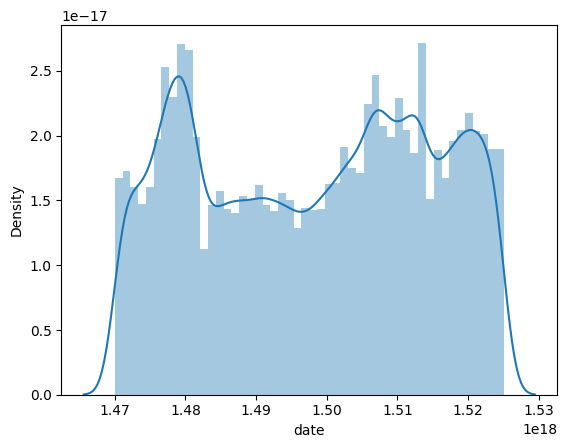

In [21]:
sns.distplot(df_train["date"])


In [22]:
above=df_train['totals_transactionRevenue']>0


In [23]:
above.value_counts()

,count
totals_transactionRevenue,
False,168993
True,1841


In [24]:
above=df_train['log_revenue']>0
above.value_counts()

,count
log_revenue,
False,168993
True,1841


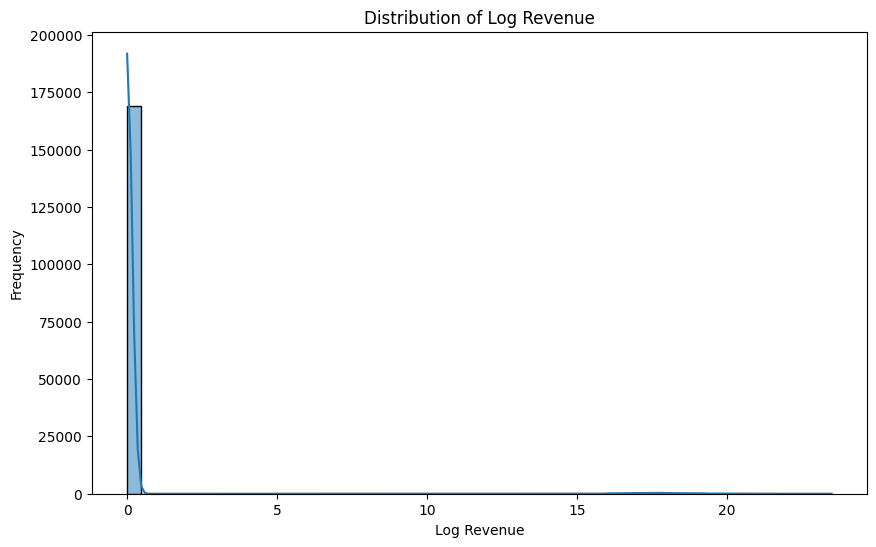

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['log_revenue'], bins=50, kde=True)
plt.title('Distribution of Log Revenue')
plt.xlabel('Log Revenue')
plt.ylabel('Frequency')
plt.show()

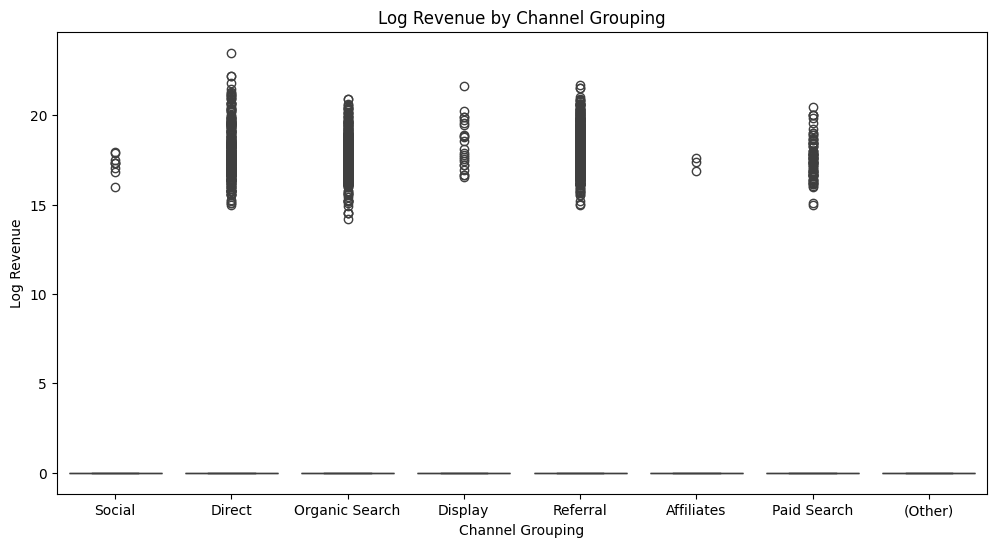

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='channelGrouping', y='log_revenue', data=df_train)
plt.title('Log Revenue by Channel Grouping')
plt.xlabel('Channel Grouping')
plt.ylabel('Log Revenue')
plt.show()

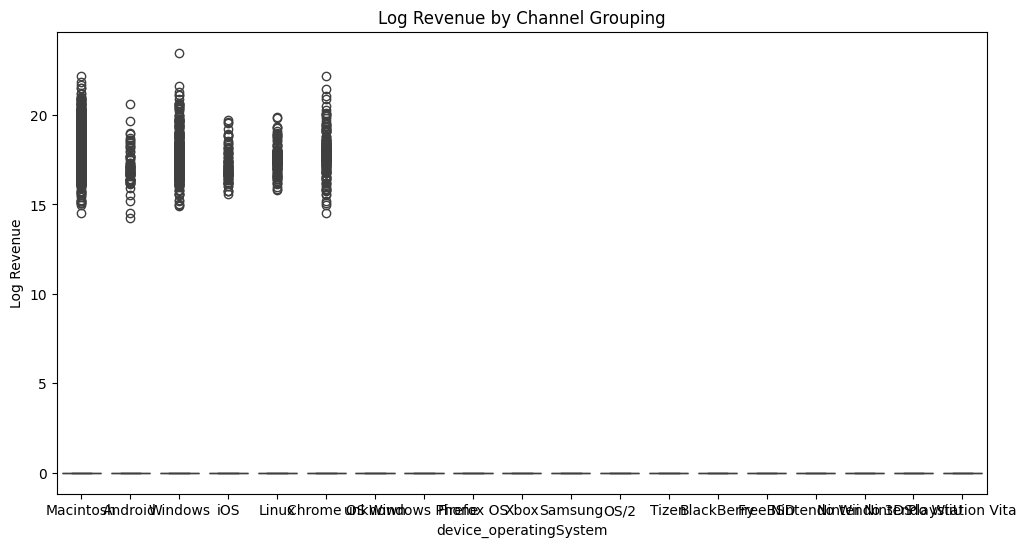

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='device_operatingSystem', y='log_revenue', data=df_train)
plt.title('Log Revenue by Channel Grouping')
plt.xlabel('device_operatingSystem')
plt.ylabel('Log Revenue')
plt.show()

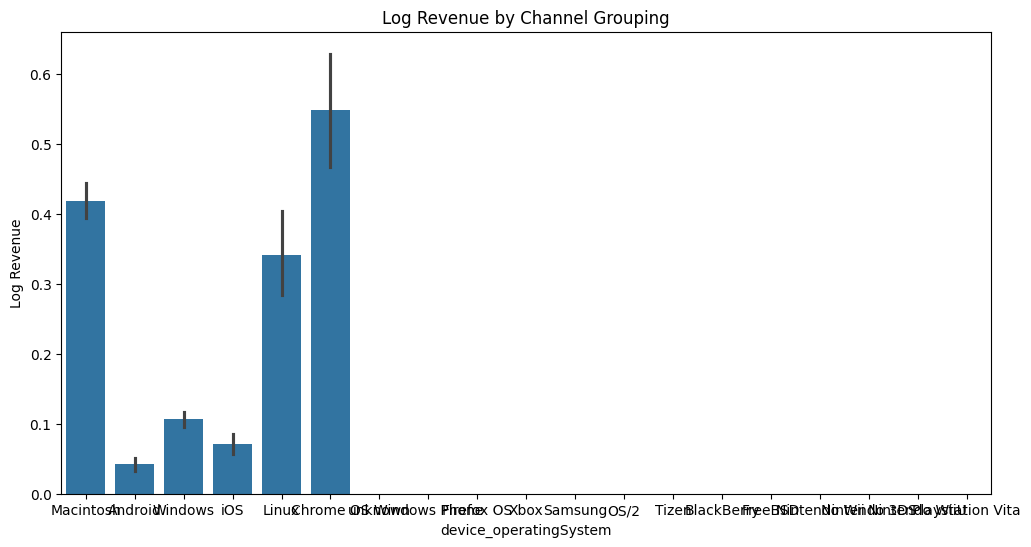

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='device_operatingSystem', y='log_revenue', data=df_train)
plt.title('Log Revenue by Channel Grouping')
plt.xlabel('device_operatingSystem')
plt.ylabel('Log Revenue')
plt.show()


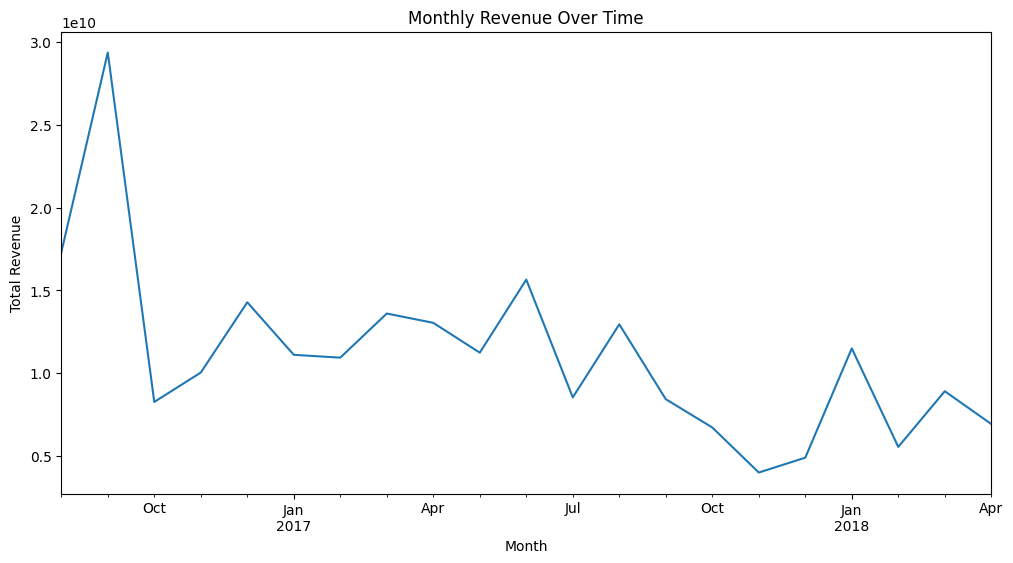

In [29]:
monthly_revenue = df_train.groupby(df_train['date'].dt.to_period('M'))['totals_transactionRevenue'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

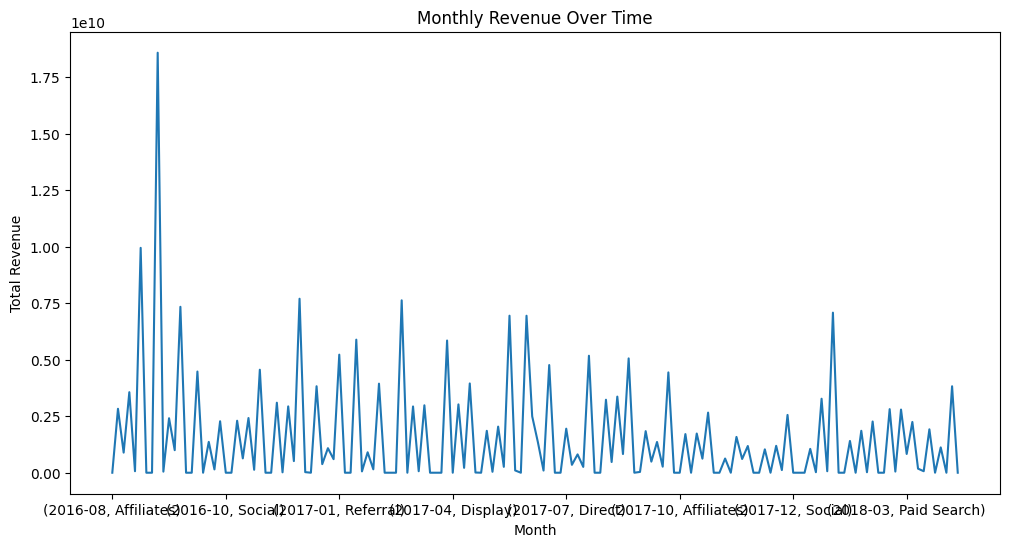

In [30]:
monthly_channel_revenue = df_train.groupby([df_train['date'].dt.to_period('M'), 'channelGrouping'])['totals_transactionRevenue'].sum()
plt.figure(figsize=(12, 6))
monthly_channel_revenue.plot(kind='line')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

In [31]:
numeric_features = df_train.select_dtypes(include=['int', 'float']).columns
numeric_features = numeric_features.drop('log_revenue')

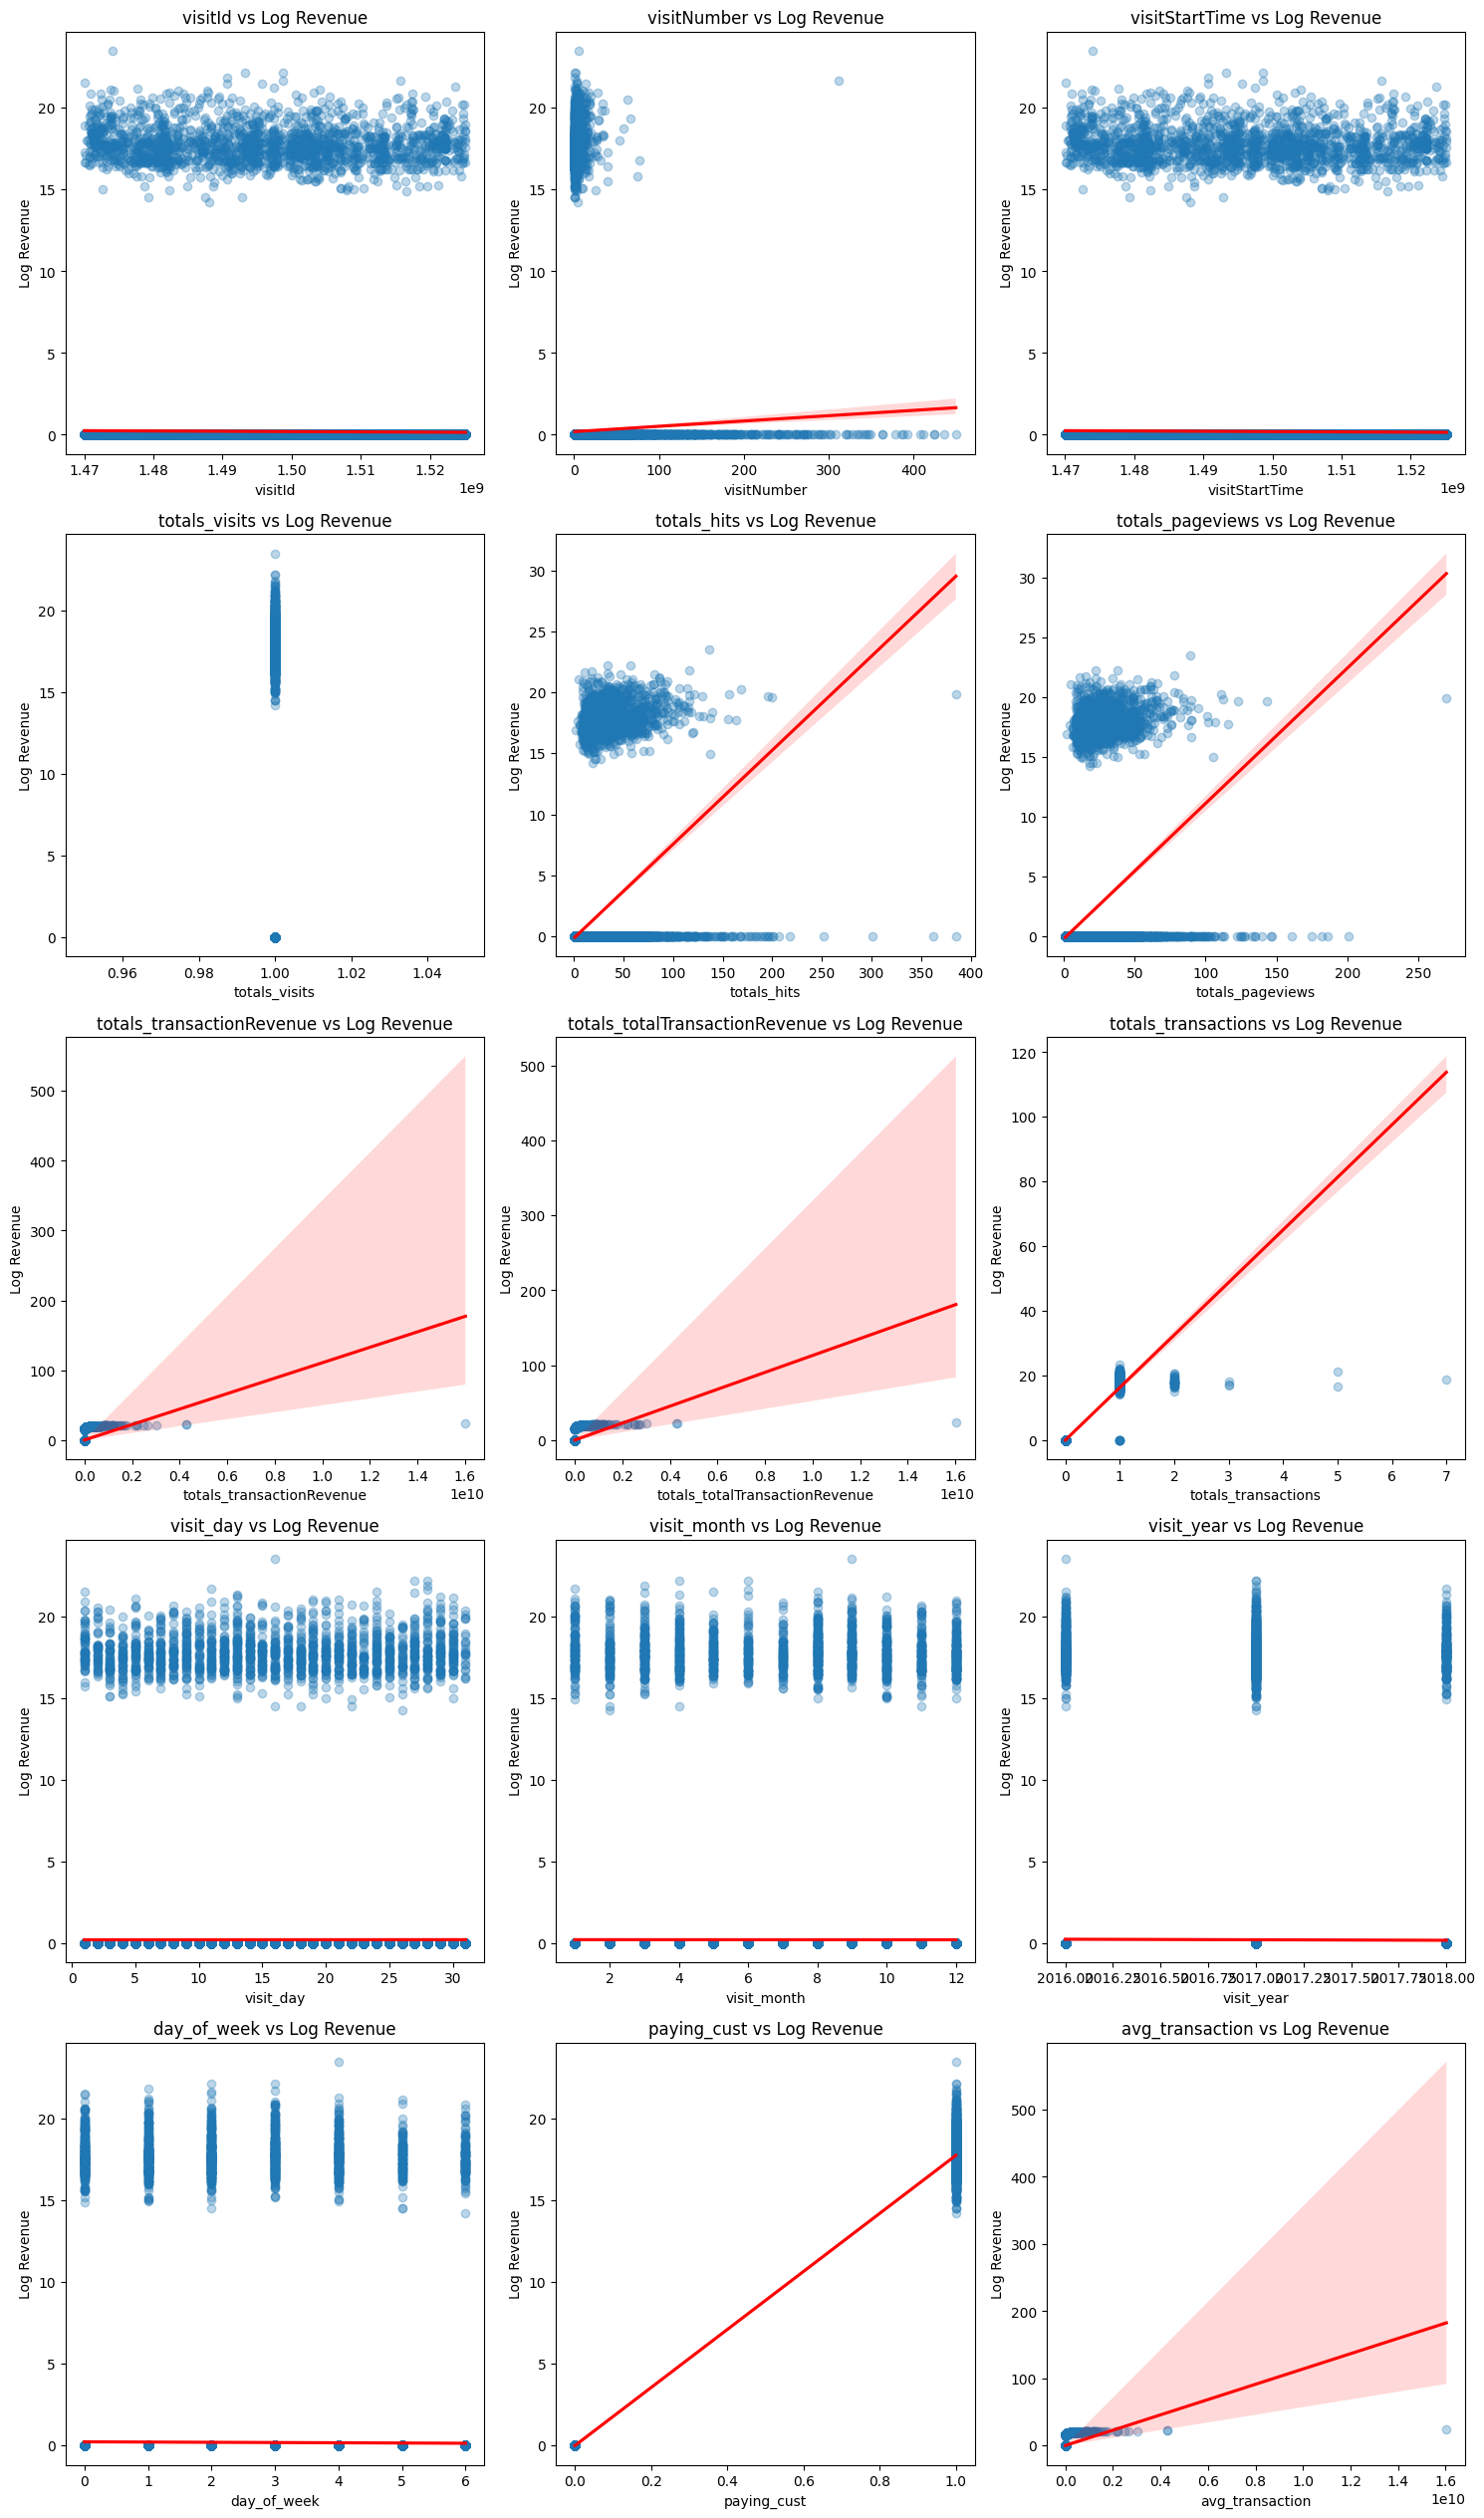

In [32]:
num_features = len(numeric_features)
num_cols = 3
num_rows = (num_features // num_cols) + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.regplot(
        x=df_train[feature],
        y=df_train['log_revenue'],
        ax=axes[i],
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'red'}
    )
    axes[i].set_title(f'{feature} vs Log Revenue')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Log Revenue')

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [33]:
df_train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'socialEngagementType',
       'visitId', 'visitNumber', 'visitStartTime', 'device_browser',
       'device_operatingSystem', 'device_isMobile', 'device_deviceCategory',
       'geoNetwork_continent', 'geoNetwork_subContinent', 'geoNetwork_country',
       'totals_visits', 'totals_hits', 'totals_pageviews',
       'trafficSource_source', 'trafficSource_medium',
       'totals_transactionRevenue', 'totals_totalTransactionRevenue',
       'totals_transactions', 'visit_day', 'visit_month', 'visit_year',
       'day_of_week', 'paying_cust', 'avg_transaction', 'log_revenue'],
      dtype='object')

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [35]:
df_train['visitStartTime'] = pd.to_datetime(df_train['visitStartTime'], unit='s')

In [36]:
df_train['visit_hour'] = df_train['visitStartTime'].dt.hour
df_train['visit_day_of_week'] = df_train['visitStartTime'].dt.dayofweek  # Monday=0, Sunday=6
df_train['is_weekend'] = df_train['visit_day_of_week'].isin([5, 6]).astype(int)

In [37]:
country_counts=df_train["geoNetwork_country"].value_counts()

In [38]:
df_train['geoNetwork_country'] = df_train['geoNetwork_country'].apply(
    lambda x: x if country_counts[x] > 100 else 'Other'
)

In [39]:
bin=['device_isMobile', 'paying_cust']
for i in bin:
  df_train[i]=df_train[i].astype(int)

In [40]:
df_train.iloc[0]

,0
channelGrouping,Social
date,2016-09-02 00:00:00
fullVisitorId,1050850727039976881
socialEngagementType,Not Socially Engaged
visitId,1472872238
visitNumber,1
visitStartTime,2016-09-03 03:10:38
device_browser,Safari
device_operatingSystem,Macintosh
device_isMobile,0


In [41]:
df_train['season'] = df_train['visit_month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else
              'Spring' if x in [3, 4, 5] else
              'Summer' if x in [6, 7, 8] else
              'Autumn'
)

In [42]:
df_train['is_month_end'] = df_train['visit_day'].apply(lambda x: 1 if x >= 26 else 0)
df_train['is_month_start'] = df_train['visit_day'].apply(lambda x: 1 if x <= 5 else 0)

In [43]:
x=df_train.drop(columns=["totals_transactionRevenue","log_revenue","date","visitId",'day_of_week',"visitStartTime","fullVisitorId","totals_totalTransactionRevenue"])
y=df_train["log_revenue"]

In [44]:
x.iloc[0]

,0
channelGrouping,Social
socialEngagementType,Not Socially Engaged
visitNumber,1
device_browser,Safari
device_operatingSystem,Macintosh
device_isMobile,0
device_deviceCategory,desktop
geoNetwork_continent,Asia
geoNetwork_subContinent,Southeast Asia
geoNetwork_country,Indonesia


In [45]:
numeric_features = [
    'totals_pageviews', 'totals_hits', 'visitNumber',
    'totals_visits', 'totals_transactions', 'avg_transaction',
    'visit_hour', 'visit_day_of_week', 'visit_day', 'visit_month', 'visit_year',
    'is_month_end', 'is_month_start'
]

In [46]:
categorical_features = [
    'channelGrouping', 'socialEngagementType', 'device_browser',
    'device_operatingSystem', 'device_deviceCategory',
    'geoNetwork_continent', 'geoNetwork_subContinent',
    'trafficSource_source', 'trafficSource_medium', 'season'
]

In [47]:
binary_features = ['device_isMobile', 'paying_cust', 'is_weekend']

In [48]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [49]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [50]:
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('passthrough', 'passthrough')
])

In [51]:
preprocessor=ColumnTransformer(transformers=[("num",numeric_transformer,numeric_features),
                                            ("cat",categorical_transformer,categorical_features),
                                             ("bin",binary_transformer,binary_features)

])

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

In [54]:
lr_model=Pipeline(steps=[("preprocessor",preprocessor),
                         ("regressor",LinearRegression())])
lr_model.fit(x_train,y_train)
pred=lr_model.predict(x_test)
rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(pred)))
print(f'Validation RMSLE: {rmsle:.4f}')


Validation RMSLE: 0.0987


In [55]:
rf_model=Pipeline(steps=[("preprocessor",preprocessor),
                         ("regressor",RandomForestRegressor())])
rf_model.fit(x_train,y_train)
pred=rf_model.predict(x_test)
rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(pred)))
print(f'Validation RMSLE: {rmsle:.4f}')

Validation RMSLE: 0.0201


In [56]:
lgbm_model=Pipeline(steps=[("preprocessor",preprocessor),
                         ("regressor",LGBMRegressor())])
lgbm_model.fit(x_train,y_train)
pred=lgbm_model.predict(x_test)
rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(pred)))
print(f'Validation RMSLE: {rmsle:.4f}')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 136667, number of used features: 128
[LightGBM] [Info] Start training from score 0.194534
Validation RMSLE: 0.0208


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [57]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=69))
])


xgb_pipeline.fit(x_train, y_train)

y_pred_xgb = xgb_pipeline.predict(x_test)
rmsle_xgb = np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_xgb)))
print(f'XGBoost Validation RMSLE: {rmsle_xgb:.4f}')

XGBoost Validation RMSLE: 0.0185


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

x_train_preprocessed = preprocessor.fit_transform(x_train)
x_val_preprocessed = preprocessor.transform(x_test)


model = Sequential()
model.add(Dense(64, input_dim=x_train_preprocessed.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(x_train_preprocessed, y_train, epochs=10, batch_size=32, verbose=1)

y_pred_nn = model.predict(x_val_preprocessed)
rmsle_nn = np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_nn.flatten())))
print(f'Neural Network Validation RMSLE: {rmsle_nn:.4f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.5878
Epoch 2/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0275
Epoch 3/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.0460
Epoch 4/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.0079
Epoch 5/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0110
Epoch 6/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0118
Epoch 7/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0149
Epoch 8/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0076
Epoch 9/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0050
Epoch 10/10
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0072
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Neural Network Validation RMSLE: 0.0355


In [63]:
from sklearn.model_selection import GridSearchCV

In [65]:
# Define the hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],  # Number of trees
    'regressor__max_depth': [3, 5, 7],           # Maximum depth of a tree
    'regressor__learning_rate': [0.01, 0.05, 0.1],  # Step size for optimization
    'regressor__subsample': [0.8, 1.0],          # Fraction of samples used for training
    'regressor__colsample_bytree': [0.8, 1.0]    # Fraction of features used for training
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_log_error',  # Use RMSLE for scoring
    cv=3,  # 3-fold cross-validation
    verbose=2  # Show detailed logs
)

# Fit GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(x_test)
rmsle_tuned = np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_tuned)))
print(f'Tuned Validation RMSLE: {rmsle_tuned:.4f}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100, regressor__subsample=0.8; total time=   3.5s
[CV] END regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100, regressor__subsample=0.8; total time=   2.2s
[CV] END regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100, regressor__subsample=0.8; total time=   3.3s
[CV] END regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100, regressor__subsample=1.0; total time=   1.5s
[CV] END regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100, regressor__subsample=1.0; total time=   3.0s
[CV] END regressor__colsample_bytree=0.8, regressor__learning_rate=0.01, regressor

In [66]:
import pickle

# Save the best model to a file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)